# Homework 2

## Your Name Here (or your names here if you are pair programming)

 - Student Name: Andre Sae
 - Student UT EID: as226576


 - Partner Name:
 - Partner UT EID:

## Practicing Pandas


In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Social Network Dataset

In this assignment we work with a social network dataset. 

You have 5 tables to work on. 

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number. 

2. **person_likes_post_file** 
This tables represents user likes. A person and a post is represented by IDs. 

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id. 

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids. 

5. **comment_hasCreator_person** 
A user can comment on posts. Each comment has a unique creator person id. 


In [2]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)
Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs. 

In [ ]:
# Code here

# Question - 2. Who wrote the most liked post?  (4 points)
Count up the number of likes for each post and find out who wrote that post. 
Print out the user id. If there are multiple maximum print them all. 

In [ ]:
# Code here 

# Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)

**Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that. 
Print out one user id. 
If there is a tie, print out the ***one***  at the tope of the list.


In [36]:
# comment_hasCreator_person.columns
post_to_num_comments = comment_replyOf_post.groupby('Post.id').size()

post_to_num_likes = person_likes_post.groupby('Post.id').size()

post_to_total_like_and_comment = post_to_num_comments + post_to_num_likes

# print(post_to_num_comments.nlargest(5))

# print(post_to_num_likes.nlargest(5))

post_id = post_to_total_like_and_comment.nlargest(1).keys()[0]

post_hasCreator_person.loc[post_hasCreator_person['Post.id'] == post_id]

,Post.id,Person.id
51882,518820,325


# Question - 4. Create two histograms for the distributions of the number of likes and comments that users have created. (4 points)
Describe the shape of these data two data distributions. 

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has. 

965


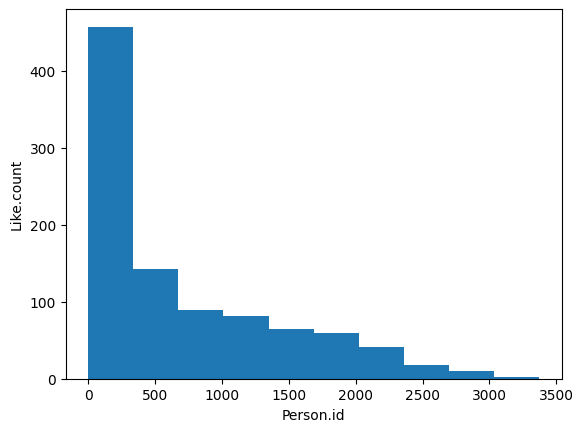

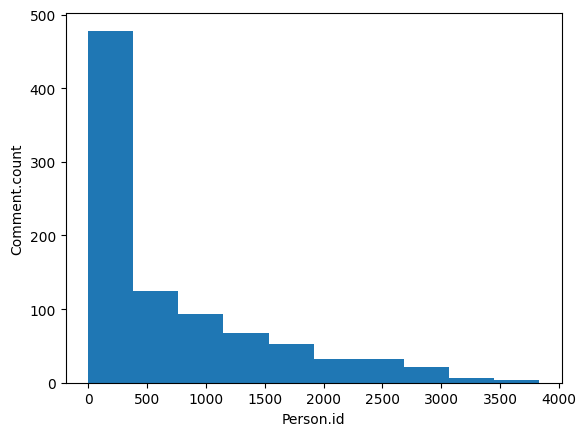

In [ ]:
person_likes_post.groupby('Person.id').size().plot.hist()

plt.xlabel("Person.id")
plt.ylabel("Like.count")

plt.show()

comment_hasCreator_person.groupby('Person.id').size().plot.hist()

plt.xlabel("Person.id")
plt.ylabel("Comment.count")

plt.show()

The shape is a pareto distribution.

# Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number. 



**Tip:** You can calculate correlation coefficient using the following formula: 
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. n is the number of users. 

**Bonus Tip:** Consider that some users might have liked posts, but not liked any comments, or vice versa.

You can use whichever technique you would like for the question, as long as it has been discussed in lecture.

 


\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}











In [74]:
import math

#
# x: likes per user
# y: comments per user
# n: number of users
#
def get_r(x: pd.Series, y: pd.Series, n: int) -> float:
    mean_x = x.mean()
    mean_y = y.mean()
    sum_xy = (x * y).sum()
    sum_x = x.sum()
    sum_y = y.sum()
    sum_x_squared = (x * x).sum()
    sqaured_sum_x = x.sum() * x.sum()
    sum_y_squared = (y * y).sum()
    squared_sum_y = y.sum() * y.sum()

    
    # return ((n * sum_xy) - (sum_x * sum_y)) / (math.sqrt(((n * sum_x_squared) - sqaured_sum_x) * ((n * sum_y_squared) - squared_sum_y)))

    return ((x - mean_x) * (y - mean_y)).sum() / (math.sqrt( ((x - mean_x) * (x - mean_x)).sum() * ((y - mean_y) * (y - mean_y)).sum()))



x = person_likes_post.groupby('Person.id').size()
y = comment_hasCreator_person.groupby('Person.id').size()

x.name = "Person Likes Post"
y.name = "Person Comments"

a = pd.merge(x, y, on='Person.id', how='outer', indicator=True)
n = len(a)
print(n)

r = get_r(x, y, n)

print("Pearson Coefficent: ")
print(r)

971
Pearson Coefficent: 
0.8937985135468518
